## Air Quality Dataset:

### ARPA data 
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [70]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

### Reading Torino Rebaudengo Station

In [71]:
def read_ARPA_csv(path):
    dataFrame = pd.read_csv(path, sep=';',dtype={'Data rilevamento': str, 'Ora':str},index_col=False ) 

    #merge date and hours and parsing
    dataFrame["Data rilevamento"] = dataFrame["Data rilevamento"] + " " +  dataFrame["Ora"]
    dataFrame["Data rilevamento"] = pd.to_datetime(dataFrame["Data rilevamento"], format='%d/%m/%Y %H:%M') 
    return dataFrame

In [72]:
to_rebaudengo_gas = read_ARPA_csv('data/ARPA/Torino-Rebaudengo_Gas_2020-01-01_2020-12-31.csv')
to_rebaudengo_gas[(to_rebaudengo_gas['Data rilevamento'] >= '2020-02-29') & (to_rebaudengo_gas['Data rilevamento'] < '2020-03-02') ]

,Data rilevamento,Ora,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Denominazione Stazione,Id Parametro,Descr. Parametro,Id Un. misura,Descr. Un. misura,Valore,Stato
1416,2020-02-29 01:00:00,01:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,126.0,V
1417,2020-02-29 02:00:00,02:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,150.0,V
1418,2020-02-29 03:00:00,03:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,115.0,V
1419,2020-02-29 04:00:00,04:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,95.0,V
1420,2020-02-29 05:00:00,05:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,99.0,V
1421,2020-02-29 06:00:00,06:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,104.0,V
1422,2020-02-29 07:00:00,07:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,184.0,V
1423,2020-02-29 08:00:00,08:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,171.0,V
1424,2020-02-29 09:00:00,09:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,162.0,V
1425,2020-02-29 10:00:00,10:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,191.0,V


### Basic statistics

In [73]:
to_rebaudengo_gas.describe(include=[float])

,Valore
count,8443.000000
mean,115.366221
std,114.515429
min,7.000000
25%,40.000000
50%,73.000000
75%,147.000000
max,913.000000


### Line plot

<AxesSubplot:xlabel='Data rilevamento', ylabel='Valore'>

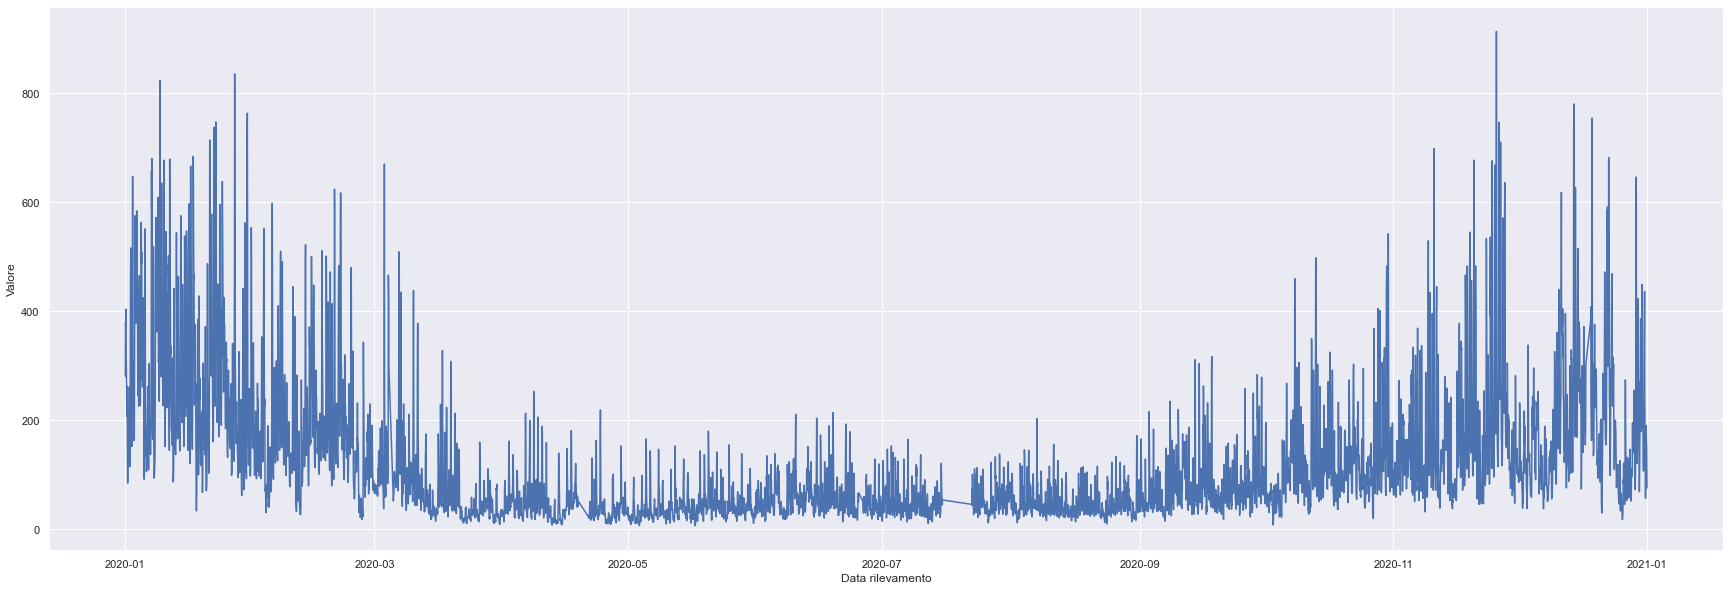

In [74]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=to_rebaudengo_gas, x="Data rilevamento", y="Valore")

### Group by Day

In [75]:
to_rebaudengo_gas_daily = to_rebaudengo_gas.resample('D', on='Data rilevamento').mean()
to_rebaudengo_gas_daily

,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Id Parametro,Id Un. misura,Valore
Data rilevamento,,,,,,
2020-01-01,13.0,1272.0,805.0,22.0,23.0,228.291667
2020-01-02,13.0,1272.0,805.0,22.0,23.0,293.125000
2020-01-03,13.0,1272.0,805.0,22.0,23.0,412.041667
2020-01-04,13.0,1272.0,805.0,22.0,23.0,350.500000
2020-01-05,13.0,1272.0,805.0,22.0,23.0,290.250000
...,...,...,...,...,...,...
2020-12-27,13.0,1272.0,805.0,22.0,23.0,94.125000
2020-12-28,13.0,1272.0,805.0,22.0,23.0,137.875000
2020-12-29,13.0,1272.0,805.0,22.0,23.0,269.166667


<AxesSubplot:xlabel='Data rilevamento', ylabel='Valore'>

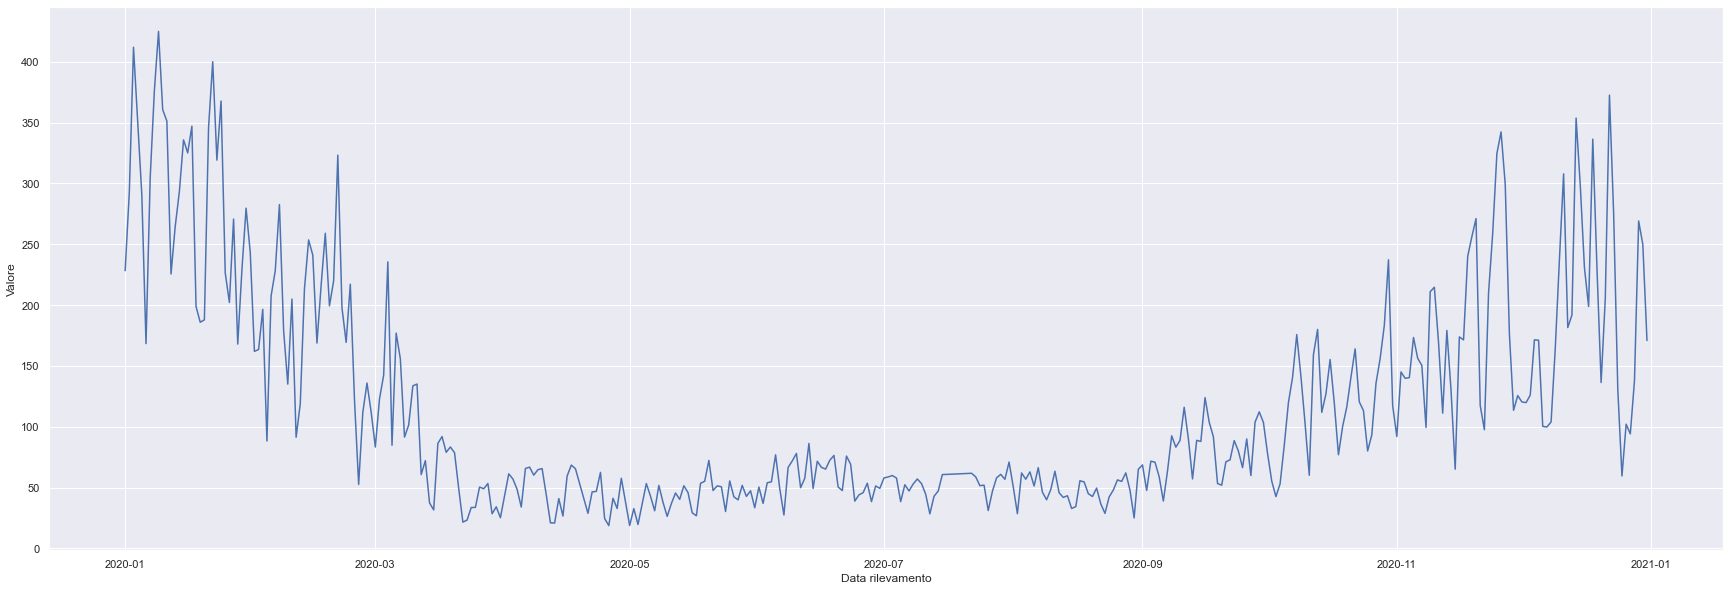

In [76]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=to_rebaudengo_gas_daily, x="Data rilevamento", y="Valore")

### Creating baseline

In [77]:
reference_period = to_rebaudengo_gas[(to_rebaudengo_gas['Data rilevamento'] >= '2020-01-03') & (to_rebaudengo_gas['Data rilevamento'] < '2020-02-06')]
basevalue = reference_period['Valore'].mean()
adjusted_data = to_rebaudengo_gas_daily[(to_rebaudengo_gas_daily.index.get_level_values('Data rilevamento') >= '2020-02-15')]
adjusted_data -= basevalue
adjusted_data


,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Id Parametro,Id Un. misura,Valore
Data rilevamento,,,,,,
2020-02-15,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-32.228884
2020-02-16,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-104.562217
2020-02-17,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-57.145551
2020-02-18,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-14.270551
2020-02-19,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-73.978884
...,...,...,...,...,...,...
2020-12-27,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-179.228884
2020-12-28,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-135.478884
2020-12-29,-260.353884,998.646116,531.646116,-251.353884,-250.353884,-4.187217


Text(0.5, 1.0, 'Torino Rebaudengo $NO_{x}$')

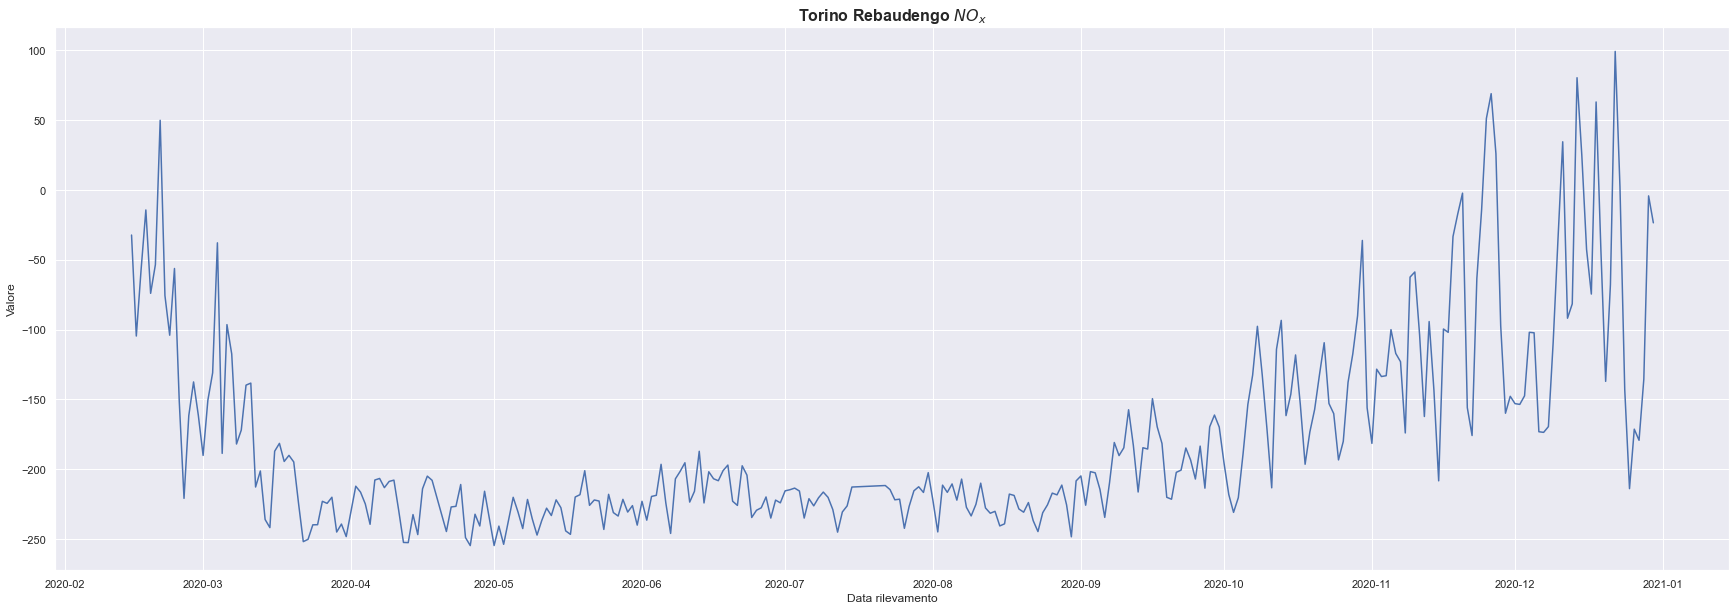

In [78]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=adjusted_data[(adjusted_data.index.get_level_values('Data rilevamento') >= '2020-02-15') & (adjusted_data.index.get_level_values('Data rilevamento') < '2020-12-31')], x="Data rilevamento", y="Valore")
plt.title("Torino Rebaudengo $NO_{x}$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

### Sum Up everything in one function

In [79]:
def get_daily_adjusted_data(path):
    initial_data=read_ARPA_csv(path)
    #group by day
    data_daily = initial_data.resample('D', on='Data rilevamento').mean()
    #adjusting on baseline
    reference_period = initial_data[(initial_data['Data rilevamento'] >= '2020-01-03') & (initial_data['Data rilevamento'] < '2020-02-06')]
    basevalue = reference_period['Valore'].mean()
    adjusted_data = data_daily[(data_daily.index.get_level_values('Data rilevamento') >= '2020-02-15')]
    adjusted_data -= basevalue
    return adjusted_data   

def get_daily_data(path,start_date):
    initial_data=read_ARPA_csv(path)
    #group by day
    data_daily = initial_data.resample('W', on='Data rilevamento').mean()
    return data_daily[(data_daily.index.get_level_values('Data rilevamento') >= start_date)]     

### Reading Torino Consolata Station

#### Biossido di Azoto (NO2)

In [80]:
to_consolata_2019_no2 = read_ARPA_csv('data/ARPA/Torino-Consolata_Biossido_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_no2 = read_ARPA_csv('data/ARPA/Torino-Consolata_Biossido_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_no2.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_no2.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_no2 = to_consolata_2019_no2.resample('W', on='Data rilevamento').mean()
to_consolata_2020_no2 = to_consolata_2020_no2.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_no2['Data']=to_consolata_2019_no2.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_no2['Data']=to_consolata_2020_no2.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_no2 = pd.merge(to_consolata_2019_no2 ,to_consolata_2020_no2 ,on=['Data','Data'])
merged_consolata_no2.set_index("Data",inplace=True)


Text(0.5, 1.0, 'Comparazione Torino Consolata - Biossido di Azoto $NO_{2}$')

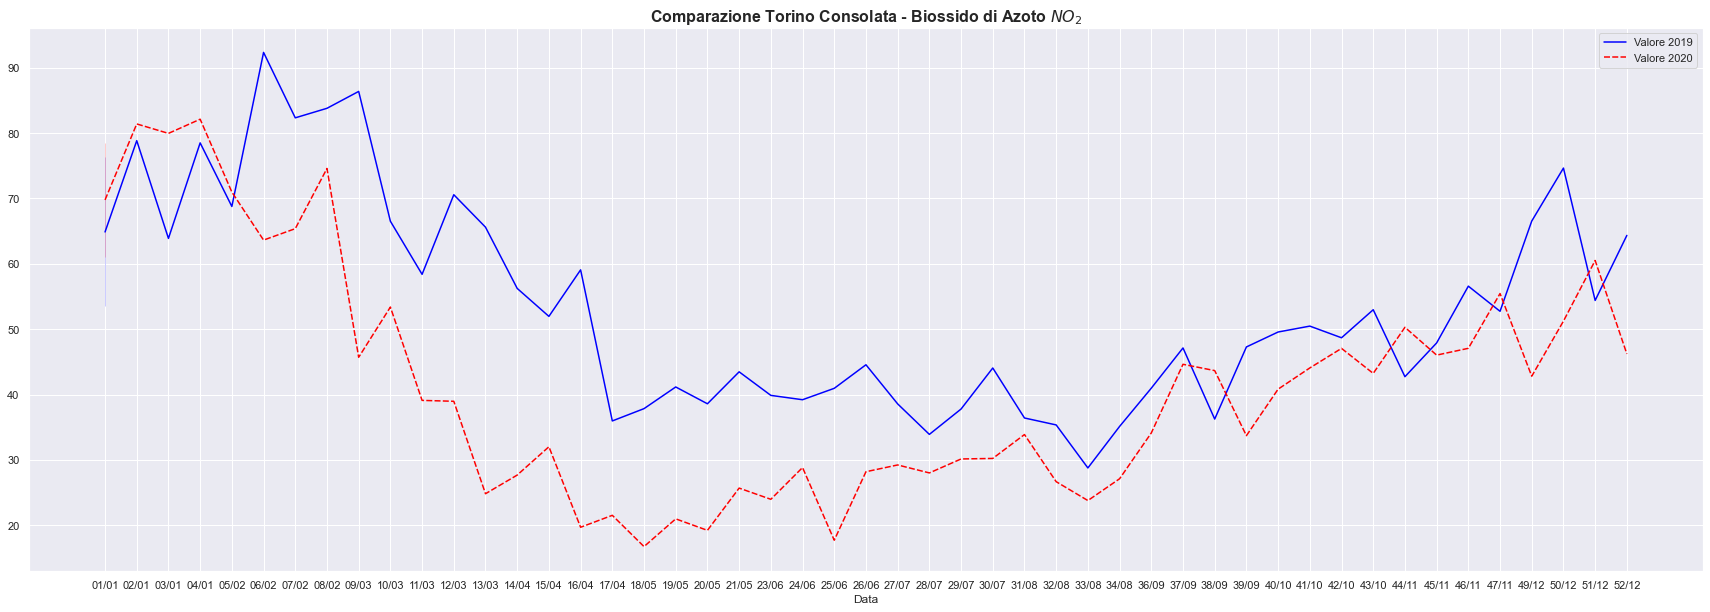

In [81]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_no2, palette=palette)
plt.title("Comparazione Torino Consolata - Biossido di Azoto $NO_{2}$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

#### Ossidi Totali di Azoto (NOx)

In [82]:
to_consolata_2019_nox = read_ARPA_csv('data/ARPA/Torino-Consolata_Gas_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_nox = read_ARPA_csv('data/ARPA/Torino-Consolata_Gas_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_nox.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_nox.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_nox = to_consolata_2019_nox.resample('W', on='Data rilevamento').mean()
to_consolata_2020_nox = to_consolata_2020_nox.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_nox['Data']=to_consolata_2019_nox.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_nox['Data']=to_consolata_2020_nox.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_nox = pd.merge(to_consolata_2019_nox ,to_consolata_2020_nox ,on=['Data','Data'])
merged_consolata_nox.set_index("Data",inplace=True)


Text(0.5, 1.0, 'Comparazione Torino Consolata - Ossidi Totali di Azoto $NO_{x}$')

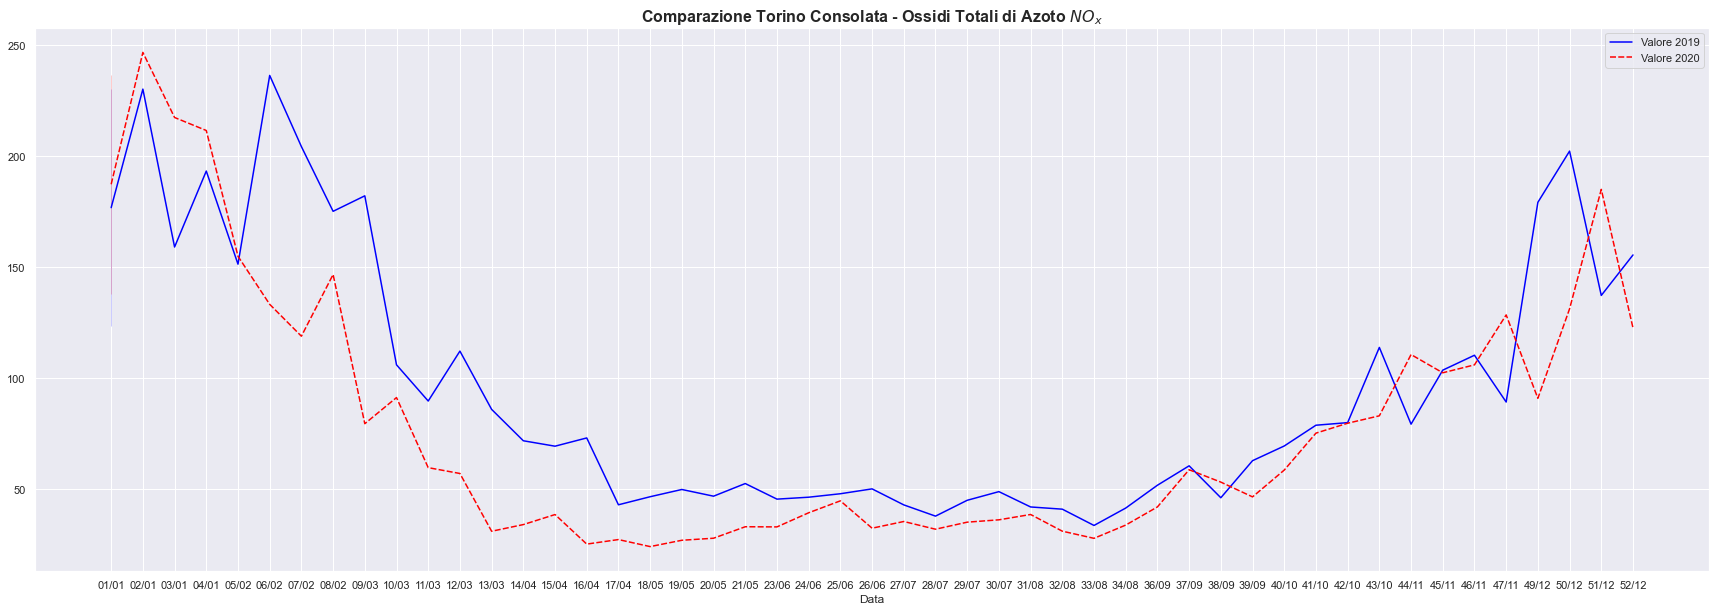

In [83]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_nox, palette=palette)
plt.title("Comparazione Torino Consolata - Ossidi Totali di Azoto $NO_{x}$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

#### Benzene

In [84]:
to_consolata_2019_benzene = read_ARPA_csv('data/ARPA/Torino-Consolata_Idrocarburi-aromatici_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_benzene = read_ARPA_csv('data/ARPA/Torino-Consolata_Idrocarburi-aromatici_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_benzene.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_benzene.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_benzene = to_consolata_2019_benzene.resample('W', on='Data rilevamento').mean()
to_consolata_2020_benzene = to_consolata_2020_benzene.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_benzene['Data']=to_consolata_2019_benzene.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_benzene['Data']=to_consolata_2020_benzene.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_benzene = pd.merge(to_consolata_2019_benzene ,to_consolata_2020_benzene ,on=['Data','Data'])
merged_consolata_benzene.set_index("Data",inplace=True)

Text(0.5, 1.0, 'Comparazione Torino Consolata - Benzene')

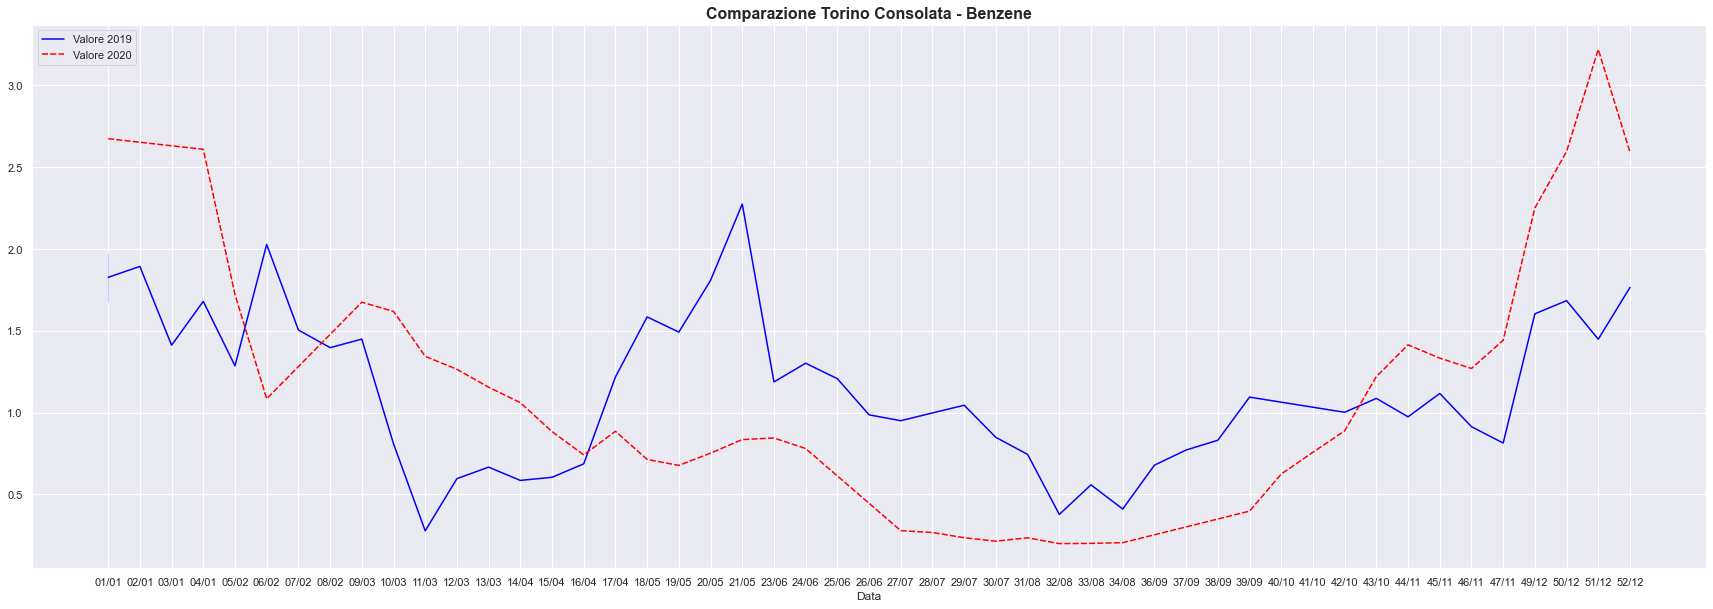

In [85]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_benzene, palette=palette)
plt.title("Comparazione Torino Consolata - Benzene",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

#### Monossido di Azoto (NO)

In [86]:
to_consolata_2019_no = read_ARPA_csv('data/ARPA/Torino-Consolata_Monossido_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_no = read_ARPA_csv('data/ARPA/Torino-Consolata_Monossido_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_no.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_no.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_no = to_consolata_2019_no.resample('W', on='Data rilevamento').mean()
to_consolata_2020_no = to_consolata_2020_no.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_no['Data']=to_consolata_2019_no.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_no['Data']=to_consolata_2020_no.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_no = pd.merge(to_consolata_2019_no ,to_consolata_2020_no ,on=['Data','Data'])
merged_consolata_no.set_index("Data",inplace=True)

Text(0.5, 1.0, 'Comparazione Torino Consolata - Monossido di Azoto $NO$')

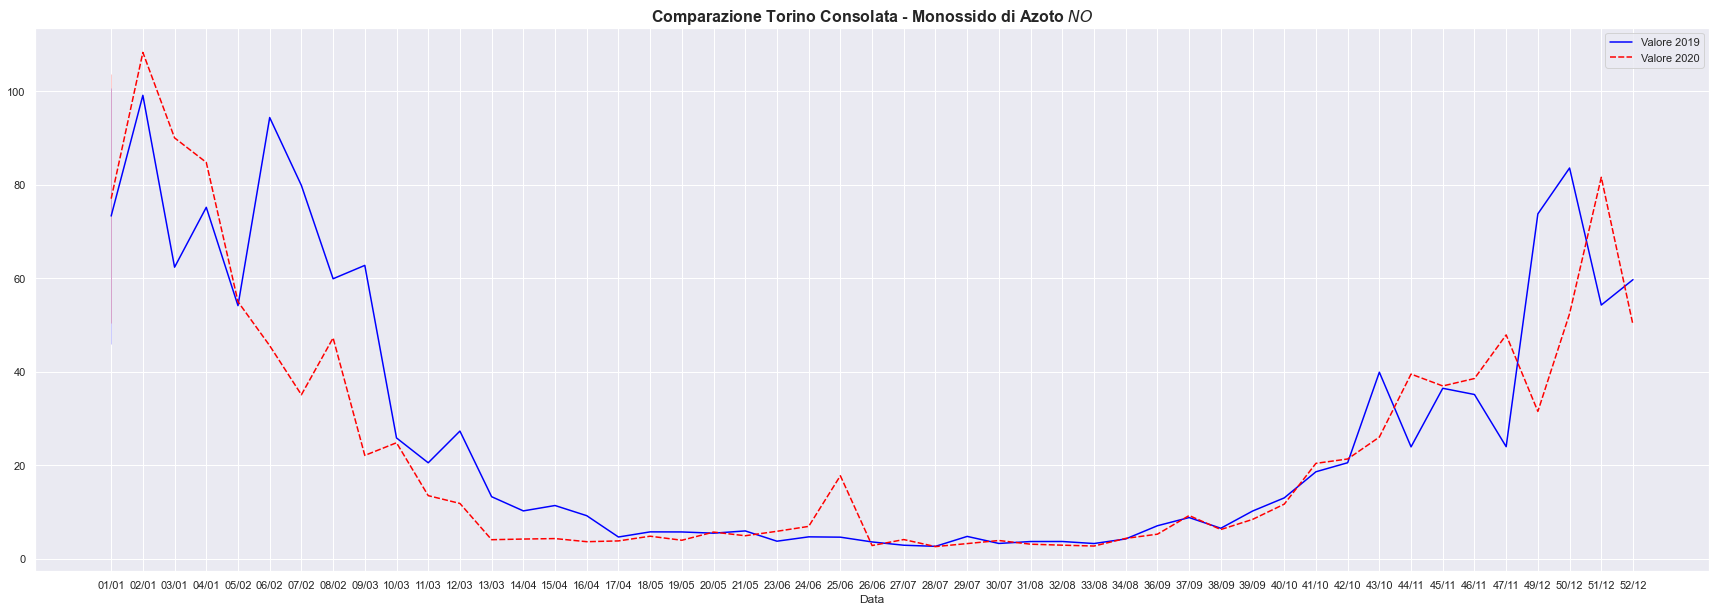

In [87]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_no, palette=palette)
plt.title("Comparazione Torino Consolata - Monossido di Azoto $NO$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

#### PM10

In [88]:
to_consolata_2019_pm10 = read_ARPA_csv('data/ARPA/Torino-Consolata_Polveri-sottili_2019-01-01_2019-12-31.csv')[['Data rilevamento', 'Valore']]
to_consolata_2020_pm10 = read_ARPA_csv('data/ARPA/Torino-Consolata_Polveri-sottili_2020-01-01_2020-12-31.csv')[['Data rilevamento', 'Valore']]

#rename value column
to_consolata_2019_pm10.rename(columns = {'Valore':'Valore 2019'}, inplace = True)
to_consolata_2020_pm10.rename(columns = {'Valore':'Valore 2020'}, inplace = True)
#group by week
to_consolata_2019_pm10 = to_consolata_2019_pm10.resample('W', on='Data rilevamento').mean()
to_consolata_2020_pm10 = to_consolata_2020_pm10.resample('W', on='Data rilevamento').mean()
# #creating grouped data
to_consolata_2019_pm10['Data']=to_consolata_2019_pm10.index.get_level_values('Data rilevamento').strftime('%U/%m')
to_consolata_2020_pm10['Data']=to_consolata_2020_pm10.index.get_level_values('Data rilevamento').strftime('%U/%m')
#merge data
merged_consolata_pm10 = pd.merge(to_consolata_2019_pm10 ,to_consolata_2020_pm10 ,on=['Data','Data'])
merged_consolata_pm10.set_index("Data",inplace=True)

Text(0.5, 1.0, 'Comparazione Torino Consolata - $PM10$')

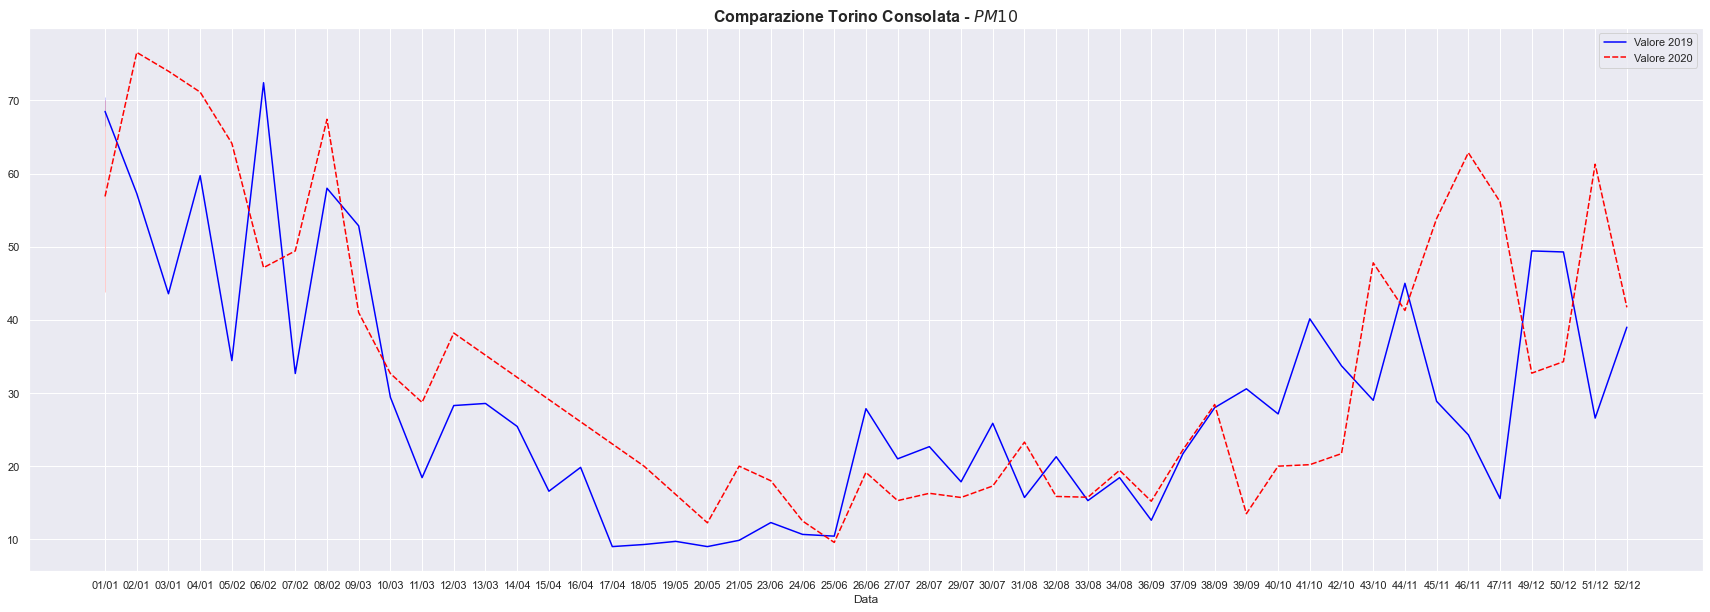

In [89]:
sns.set_theme()
plt.figure(figsize=(30, 10))
palette = ["blue","red"]
sns.lineplot(data=merged_consolata_pm10, palette=palette)
plt.title("Comparazione Torino Consolata - $PM10$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

### Reading Torino Lingotto Station

Text(0.5, 1.0, 'Torino Lingotto $NO_{x}$')

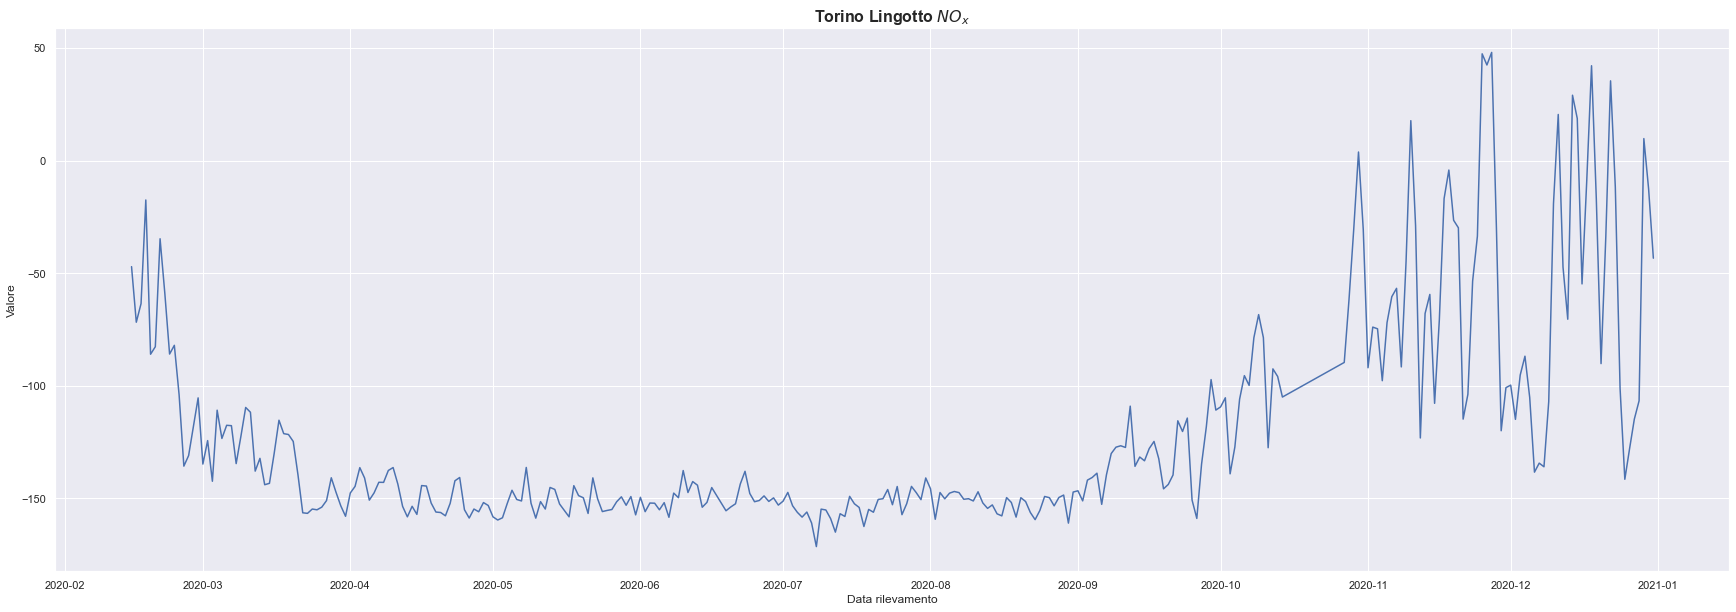

In [90]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=get_daily_adjusted_data('data/ARPA/Torino-Lingotto_Gas_2020-01-01_2020-12-31.csv'), x="Data rilevamento", y="Valore")
plt.title("Torino Lingotto $NO_{x}$",fontdict= { 'fontsize': 16, 'fontweight':'bold'})

# Grouped By All Stations

## PM10

[]

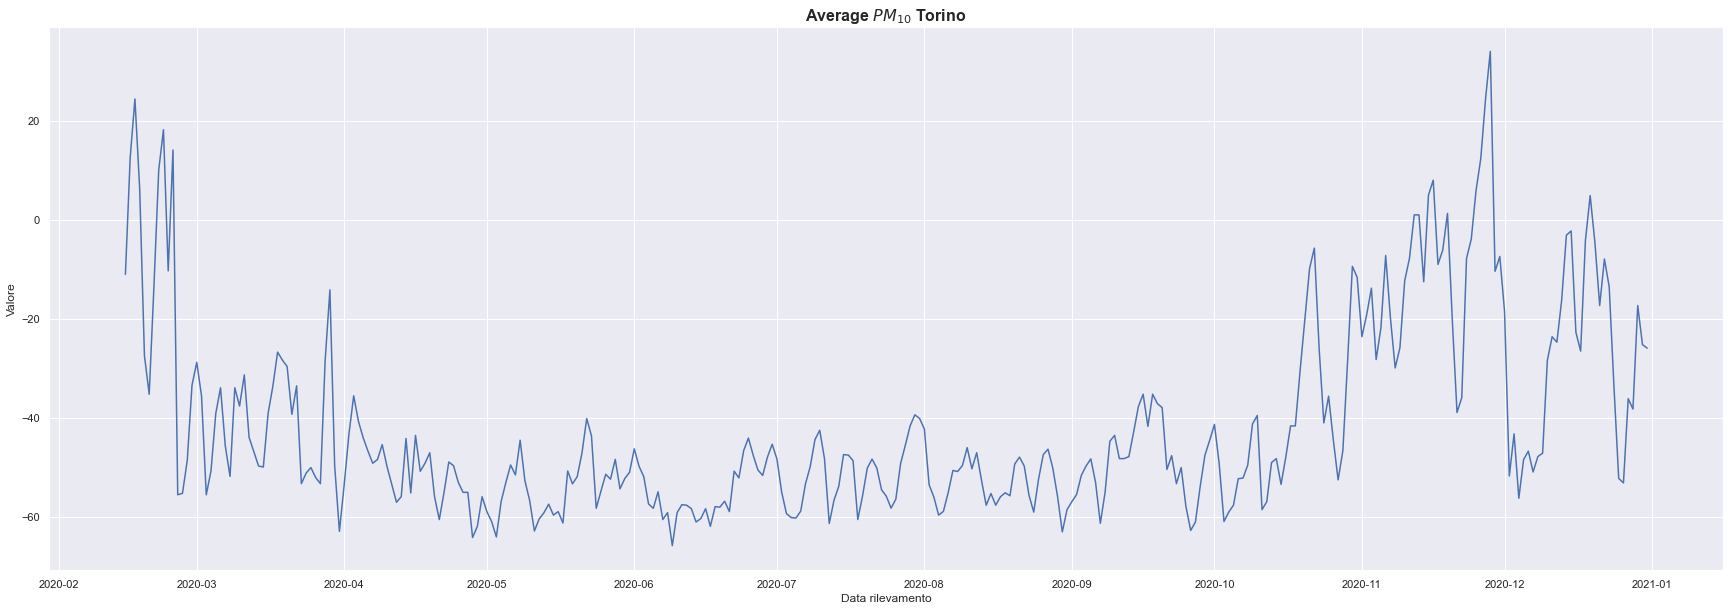

In [103]:
consolata_pm10=get_daily_adjusted_data('data/ARPA/Torino-Consolata_Polveri-sottili_2020-01-01_2020-12-31.csv')
rebaudengo_pm10 = get_daily_adjusted_data('data/ARPA/Torino-Rebaudengo_Polveri-sottili_2020-01-01_2020-12-31.csv')
lingotto_pm10 = get_daily_adjusted_data('data/ARPA/Torino-Lingotto_Polveri-sottili_2020-01-01_2020-12-31.csv')
rubino_pm10 = get_daily_adjusted_data('data/ARPA/Torino-Rubino_Polveri-sottili_2020-01-01_2020-12-31.csv')
grassi_pm10 =get_daily_adjusted_data('data/ARPA/Torino-Grassi_Polveri-sottili_2020-01-01_2020-12-31.csv')
avg_turin_pm10=pd.concat([rebaudengo_pm10,consolata_pm10,lingotto_pm10,rubino_pm10,grassi_pm10]).groupby('Data rilevamento', as_index=True).mean()

plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_pm10, x="Data rilevamento", y="Valore")
plt.title("Average $PM_{10}$ Torino ",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.plot()

## NOX

[]

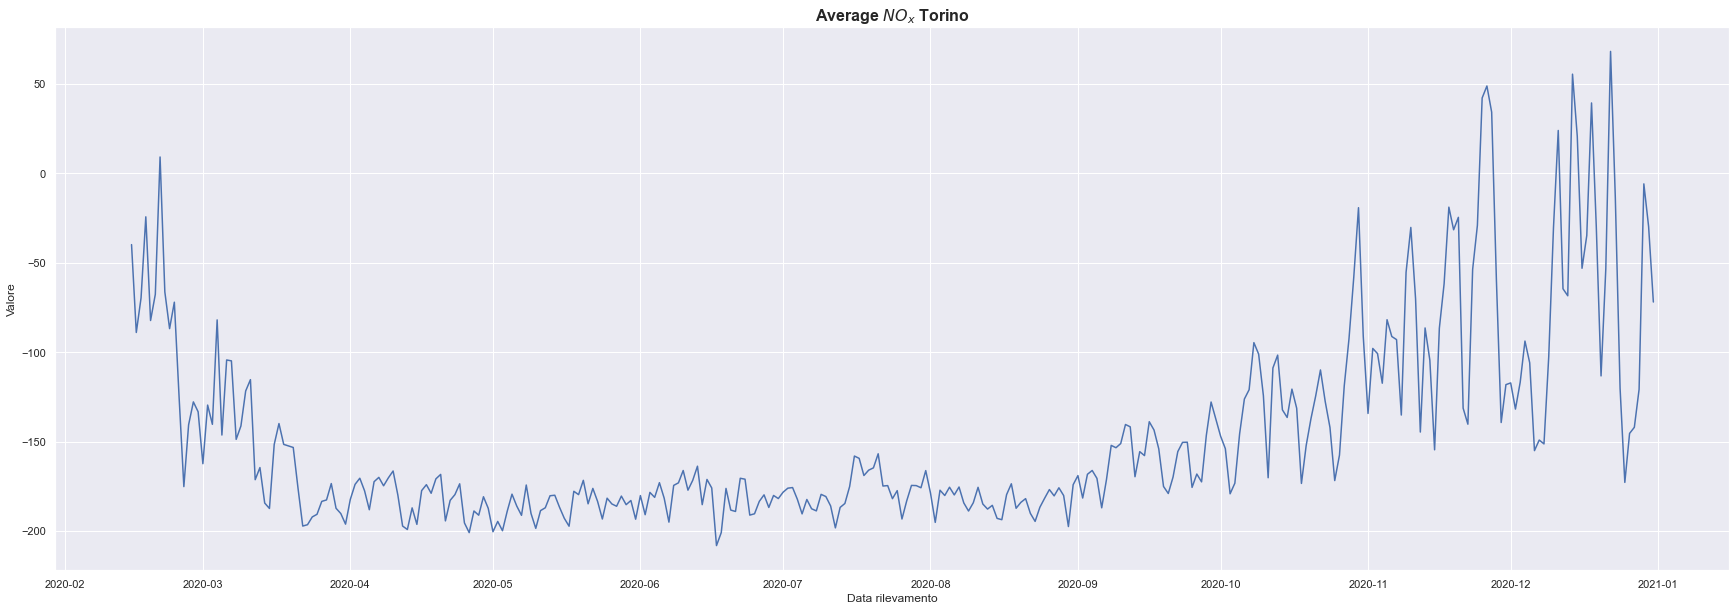

In [105]:
consolata_nox=get_daily_adjusted_data('data/ARPA/Torino-Consolata_Gas_2020-01-01_2020-12-31.csv')
rebaudengo_nox = get_daily_adjusted_data('data/ARPA/Torino-Rebaudengo_Gas_2020-01-01_2020-12-31.csv')
lingotto_nox = get_daily_adjusted_data('data/ARPA/Torino-Lingotto_Gas_2020-01-01_2020-12-31.csv')
# rubino_nox = get_daily_adjusted_data('data/ARPA/Torino-Rubino_Gas_2020-01-01_2020-12-31.csv')
# grassi_nox =get_daily_adjusted_data('data/ARPA/Torino-Grassi_Gas_2020-01-01_2020-12-31.csv')
avg_turin_nox=pd.concat([consolata_nox,rebaudengo_nox,lingotto_nox]).groupby('Data rilevamento', as_index=True).mean()


plt.figure(figsize=(30, 10))
sns.lineplot(data=avg_turin_nox, x="Data rilevamento", y="Valore")
plt.title("Average $NO_{x}$ Torino ",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
plt.plot()